In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Cargar los datos de IMDB y limitar el vocabulario a las 10,000 palabras más frecuentes
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Realizar padding - clasificacion de las secuencias para que todas tengan la misma longitud
maxlen = 500
x_train_pad = pad_sequences(x_train, maxlen=maxlen, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test, maxlen=maxlen, padding='post', truncating='post')

# Crear el modelo - LSTM recurrente 
model = Sequential([
    Embedding(input_dim=10000, output_dim=32, input_length=maxlen),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train_pad, y_train, epochs=10, batch_size=128, validation_data=(x_test_pad, y_test), callbacks=[EarlyStopping(patience=2)])

# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(x_test_pad, y_test)

print(f"Model 1 - Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}")
# Guardar el modelo entrenado
model.save("modelo.h5")


17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/10
196/196 [==============================] - 118s 583ms/step - loss: 0.6930 - accuracy: 0.5016 - val_loss: 0.6937 - val_accuracy: 0.5053
Epoch 2/10
196/196 [==============================] - 115s 590ms/step - loss: 0.6905 - accuracy: 0.5170 - val_loss: 0.6919 - val_accuracy: 0.5086
Epoch 3/10
196/196 [==============================] - 114s 585ms/step - loss: 0.6834 - accuracy: 0.5232 - val_loss: 0.6925 - val_accuracy: 0.5078
Epoch 4/10
782/782 [==============================] - 41s 53ms/step - loss: 0.6960 - accuracy: 0.5154
Model 1 - Test loss: 0.696, Test accuracy: 0.515


782/782 [==============================] - 46s 58ms/step


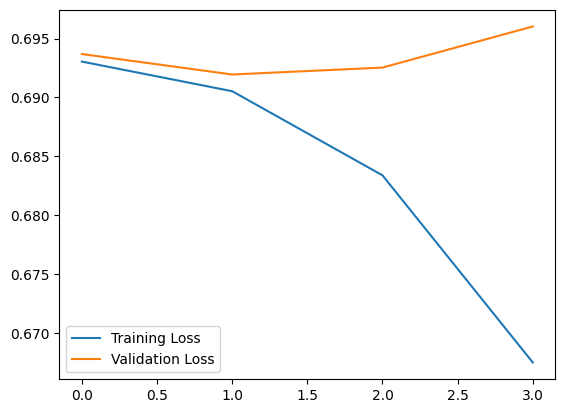

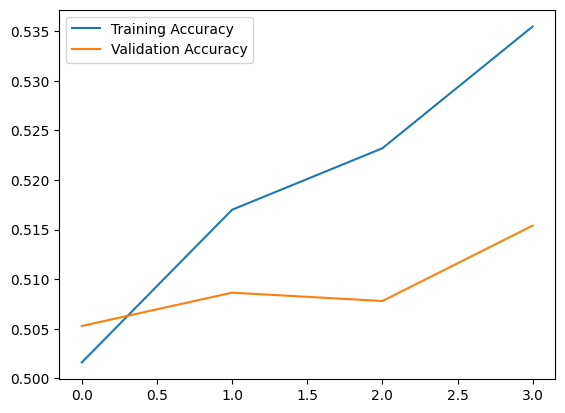

Confusion Matrix:
[[12039   461]
 [11654   846]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Obtener las predicciones del modelo en los datos de prueba
y_pred = model.predict(x_test_pad)

# Convertir las probabilidades a etiquetas binarias
y_pred = np.round(y_pred)

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Graficar la evolución del loss y accuracy durante el entrenamiento
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Imprimir la matriz de confusión
print('Confusion Matrix:')
print(cm)


In [ ]:
# Prompt the user to enter a review for classification
user_review = input("Enter a review for classification: ")

# Tokenize the user's review using the IMDB dataset's word index
word_index = imdb.get_word_index()
user_tokens = [word_index[word] if word in word_index else 0 for word in user_review.split()]

# Pad the user's tokens to a maximum length of 256 words
user_padded = pad_sequences([user_tokens], maxlen=maxlen)

# Use the trained model to predict the sentiment of the user's review
prediction = model.predict(user_padded)[0][0]

# Print the predicted sentiment
if prediction >= 0.5:
    print(f"Prediction: {prediction}")
    print("Positive review!")
else:
    print(f"Prediction: {prediction}")
    print("Negative review.")

Enter a review for classification: nice movie
1/1 [==============================] - 0s 52ms/step
Prediction: 0.5071957111358643
Positive review!
